# Kaggle 
https://www.kaggle.com/datasets/lava18/google-play-store-apps
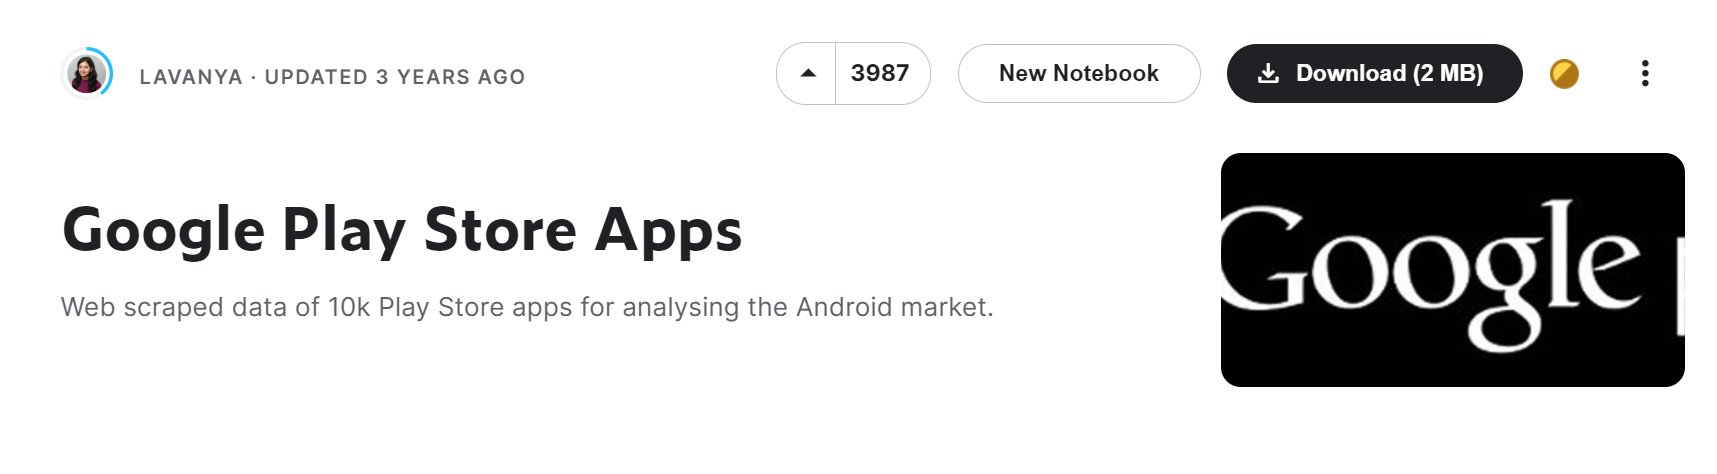

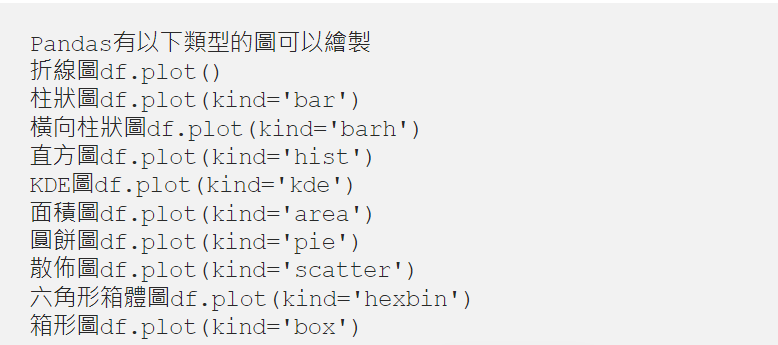

In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [368]:
data=pd.read_csv("googleplaystore.csv",header=0)
df=data.copy()
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [369]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [370]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [371]:
df["Rating"]=df["Rating"].fillna(value=df["Rating"].mean())

In [372]:
# category_list=list(df.Category.unique())
# review_list=[]
# for i in category_list:
#     filter_for_catagory=df.Category==i
#     filtered=df[filter_for_catagory]
#     sum_reviewsfor_catagory=sum(filtered.Reviews)/1000000   #million
#     review_list.append(sum_reviewsfor_catagory)
# review_list

# reviews according to categories

In [373]:
#第一種取代方法
df.loc[df["Category"]=="1.9",["Category"]]='noCatagory'
#第二種取代方法
df.Category.replace(['1.9'],'noCatagory',inplace=True)
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       'noCatagory'], dtype=object)

In [374]:
df.Reviews.replace(['3.0M'],3000000.0,inplace=True)
df.Reviews=df.Reviews.astype(float) 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'GAME'),
  Text(1, 0, 'COMMUNICATION'),
  Text(2, 0, 'SOCIAL'),
  Text(3, 0, 'FAMILY'),
  Text(4, 0, 'TOOLS')])

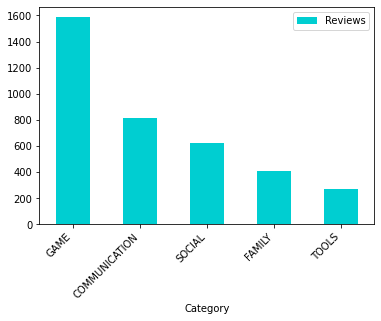

In [375]:
review_list=df.pivot_table(index="Category",values="Reviews",aggfunc="sum")/1000000    

review_list=review_list.sort_values(by=["Reviews"],ascending=False).head(5)
review_list.plot(kind="bar",color="darkturquoise")

plt.xticks(rotation=45,ha='right')

# compare Installs and Size according to category

In [376]:
df["Installs"].replace(['0',"Free","0+"],'1+',inplace=True)
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+'], dtype=object)

## Method about  convert specific content in string 
### (10,000 take off ",") 
### (10,000k convert to "million" )

In [377]:
# "+" will not influence to convert to float
Installs=[]
[Installs.append(float(x[:-1].replace(',' , '')))for x in df.Installs]
df["Installs"]=pd.Series(Installs)
df["Installs"].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00])

In [378]:
df["Size"].unique()

sizedata=[]

for i in df['Size']:
    if i[-1]=='k':
        sizedata.append(float(i[:-1])*1000)
    elif i[-1]=='M':
        sizedata.append(float(i[:-1])*1000000)
    else:
        sizedata.append(0.0) 

df.Size=pd.Series(sizedata)
df.Size.replace(0.0,df.Size.mean(),inplace=True)
df["Size"].head()

0    19000000.0
1    14000000.0
2     8700000.0
3    25000000.0
4     2800000.0
Name: Size, dtype: float64

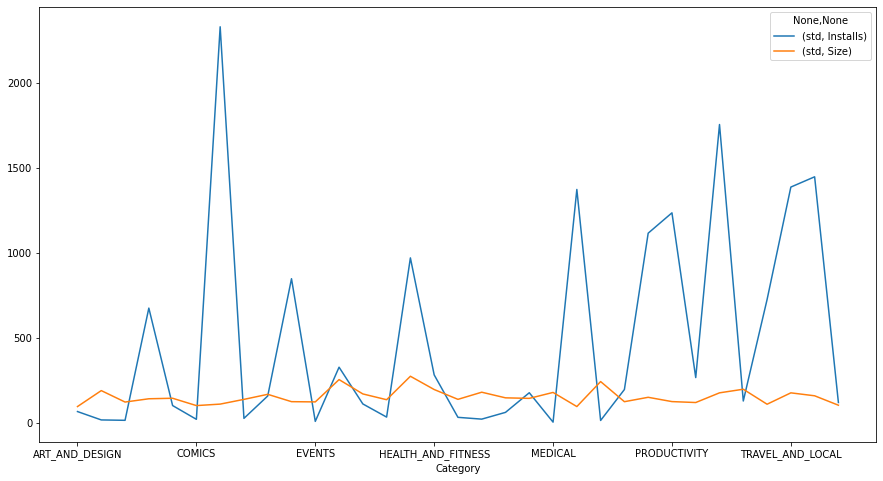

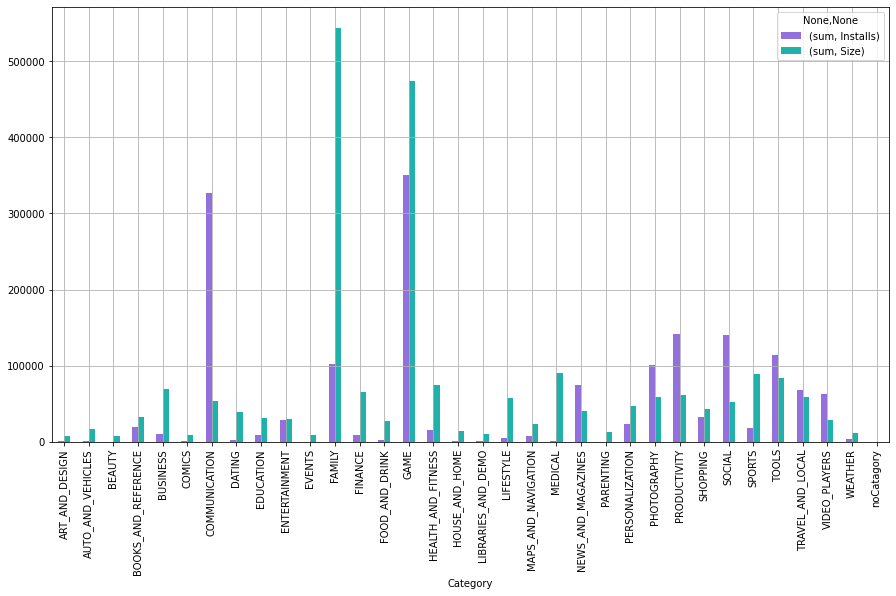

In [379]:
df1=df.pivot_table(index="Category",values=["Installs","Size"],aggfunc=["std"])/100000
df2=df.pivot_table(index="Category",values=["Installs","Size"],aggfunc=["sum"])/100000

df1.plot(kind="line",figsize=(15,8))
df2.plot(kind="bar",color=['mediumpurple',"lightseagreen"],figsize=(15,8))
plt.grid()
# df1

In [380]:
# 把一個莫名其妙的資料，以"Free"取代
df.loc[df["Type"]=="0",["Type"]]="Free"
df["Type"].value_counts()

Free    10040
Paid      800
Name: Type, dtype: int64

In [381]:
df.loc[df["Price"]=="Everyone",["Price"]]="0"
df["Price"]=df["Price"].str.replace("$","")
df["Price"]=df["Price"].astype("float")
df["Price"]

C:\Users\dream\.conda\envs\ai37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10841, dtype: float64

In [382]:
categorylist=df["Category"].value_counts().index
categorylist

Index(['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'BUSINESS', 'PRODUCTIVITY',
       'PERSONALIZATION', 'COMMUNICATION', 'SPORTS', 'LIFESTYLE', 'FINANCE',
       'HEALTH_AND_FITNESS', 'PHOTOGRAPHY', 'SOCIAL', 'NEWS_AND_MAGAZINES',
       'SHOPPING', 'TRAVEL_AND_LOCAL', 'DATING', 'BOOKS_AND_REFERENCE',
       'VIDEO_PLAYERS', 'EDUCATION', 'ENTERTAINMENT', 'MAPS_AND_NAVIGATION',
       'FOOD_AND_DRINK', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO',
       'AUTO_AND_VEHICLES', 'WEATHER', 'ART_AND_DESIGN', 'EVENTS', 'PARENTING',
       'COMICS', 'BEAUTY', 'noCatagory'],
      dtype='object')

In [383]:
df['pricelist'] = pd.cut(df['Price'], [0.99,10,20,150,300,400], labels=['<=10',"11-20",'21-150',"150-300","301-400"])
pricelist = df.groupby(['pricelist', 'Category']).agg({'App':'count'})
# pricedf=df.pivot_table(index="Category",columns="pricelist",values="App",aggfunc="count")
pricelist

App
pricelist Category                
<=10      ART_AND_DESIGN         3
          AUTO_AND_VEHICLES      3
          BEAUTY                 0
          BOOKS_AND_REFERENCE   24
          BUSINESS               9
...                            ...
301-400   TOOLS                  0
          TRAVEL_AND_LOCAL       0
          VIDEO_PLAYERS          0
          WEATHER                0
          noCatagory             0

[170 rows x 1 columns]

In [396]:
df["Content Rating"].replace(["Unrated","nan"],"Everyone",inplace=True)

pricedf=df.pivot_table(index="Category",columns="Content Rating",values="Installs",aggfunc="sum")/100000
pricedf

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen
Category,,,,,
ART_AND_DESIGN,NaN,638.28101,5.00000,NaN,600.10000
AUTO_AND_VEHICLES,NaN,421.30211,10.00000,NaN,100.00000
BEAUTY,NaN,267.17050,1.10000,1.20000,2.50000
BOOKS_AND_REFERENCE,NaN,2412.43566,211.10000,55.01000,16536.15010
BUSINESS,NaN,10018.11831,0.00100,0.00005,1.02930
COMICS,10.0,124.76100,5.10050,23.10000,397.90000
COMMUNICATION,NaN,301325.49591,NaN,3801.10010,21346.16650
DATING,NaN,20.27896,NaN,2602.52001,20.30910
EDUCATION,NaN,8064.02000,620.00000,20.50000,10.00000


<AxesSubplot:>

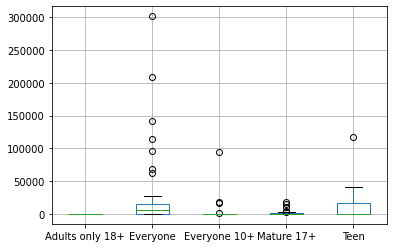

In [402]:
pricedf.boxplot()

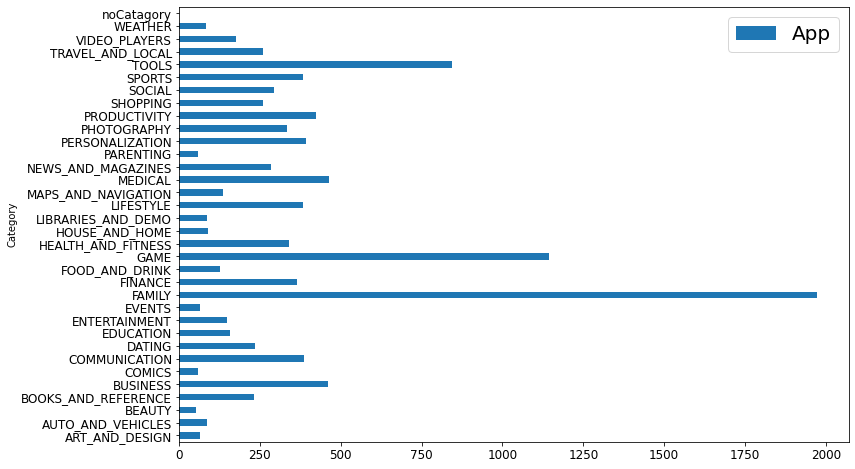

In [403]:
pricedf=df.pivot_table(index="Category",values="App",aggfunc="count")
pricedf.plot(kind="barh",figsize=(12,8),label="Category")

plt.tick_params(axis="both",labelsize=12)
plt.legend(fontsize=20)

In [388]:
pricedf.head()

pricelist,<=10,11-20,21-150,150-300,301-400
Category,,,,,
ART_AND_DESIGN,3,0,0,0,0
AUTO_AND_VEHICLES,3,0,0,0,0
BEAUTY,0,0,0,0,0
BOOKS_AND_REFERENCE,24,0,0,0,0
BUSINESS,9,3,1,0,0


,App
Content Rating,
Adults only 18+,3
Everyone,8714
Everyone 10+,414
Mature 17+,499
Teen,1208
Unrated,3


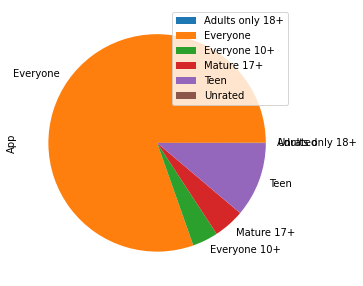

In [389]:
df["Content Rating"]=df["Content Rating"].fillna(value="Unrated")
content_rate=df.pivot_table(index="Content Rating",values="App",aggfunc="count")
content_rate.plot(kind="pie",subplots=True,figsize=(5,5))
content_rate